# Computational Cognitive Neuroscience

## Assignment 2 

#### Douwe van Erp (s4258126) & Arianne Meijer - van de Griend (s4620135)

In [1]:
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
import utils
import numpy as np
from chainer.cuda import to_cpu
from chainer.dataset import concat_examples
import matplotlib.pyplot as plt

### Definition of the different models

TODO explanation neural network

In [2]:
class FCNN1(Chain):
    def __init__(self, n_out):
        super(FCNN1, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_out)

    def __call__(self, x):
        y = self.l1(x)
        return y

class FCNN2(Chain):
    def __init__(self, n_units, n_out):
        super(FCNN2, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)
            self.l2 = L.Linear(None, n_out)

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        y = self.l2(h1)
        return y

class FCNN3(Chain):
    def __init__(self, n_units, n_out):
        super(FCNN3, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)
            self.l2 = L.Linear(None, n_units)
            self.l3 = L.Linear(None, n_out)

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        y = self.l2(h2)
        return y

TODO explanation convolutional network

In [3]:
class CNN(Chain):
    def __init__(self, n_units, n_out):
        super(CNN, self).__init__()
        with self.init_scope():
            # 5 output channels, kernel size of 5, stride of 1, padding of 0
            self.l_conv = L.Convolution2D(None, 5, 5, 1, 0)
            self.l_fc = L.Linear(None, n_units)
            self.l_out = L.Linear(None, n_out)

    def __call__(self, x):
        h1 = F.max_pooling_2d(self.l_conv(x), 5, 1, 0)
        h2 = F.relu(self.l_fc(h1))
        y = self.l_out(h2)
        return y

TODO explanation extended network

In [4]:
# Model iwth additional components (e.g. one of dropout, batch normalization, other activation functions, etc.).

### Performance deep neural networks
TODO visualise, interpret the results 

In [5]:
def train_model(model):
    max_epoch = 20
    train_loss = []
    val_loss = []
    
    while train_iter.epoch < max_epoch:
    
        # Next minibatch
        train_batch = train_iter.next()
        image_train, target_train = concat_examples(train_batch)
    
        # Feedforward pass
        prediction_train = model(image_train)
    
        # Softmax cross entropy loss
        loss = F.softmax_cross_entropy(prediction_train, target_train)
    
        # Backpropagation
        model.cleargrads()
        loss.backward()
    
        # Update all the trainable paremters
        optimizer.update()
    
        # Check the validation accuracy of prediction after every epoch
        if train_iter.is_new_epoch:
    
            # Display the training loss
            print('epoch:{:02d} train_loss:{:.04f} '.format(train_iter.epoch, float(to_cpu(loss.data))), '')
    
            train_loss.append(float(to_cpu(loss.data)))
    
            test_losses = []
            test_accuracies = []
            while True:
                test_batch = test_iter.next()
                image_test, target_test = concat_examples(test_batch)
    
                # Forward pass
                prediction_test = model(image_test)
    
                # Calculate the loss
                loss_test = F.softmax_cross_entropy(prediction_test, target_test)
                test_losses.append(to_cpu(loss_test.data))
    
                # Calculate the accuracy
                accuracy = F.accuracy(prediction_test, target_test)
                accuracy.to_cpu()
                test_accuracies.append(accuracy.data)
    
                if test_iter.is_new_epoch:
                    test_iter.epoch = 0
                    test_iter.current_position = 0
                    test_iter.is_new_epoch = False
                    test_iter._pushed_position = None
                    break
    
            print('val_loss:{:.04f} val_accuracy:{:.04f}'.format(np.mean(test_losses), np.mean(test_accuracies)))
            
            val_loss.append(np.mean(test_losses))
            
    return max_epoch, train_loss, val_loss

In [6]:
def plot_training(epoch, train_loss, val_loss, title): 
    x = range(epoch)          
    fig = plt.figure()
    ax = plt.subplot(111)
    
    ax.plot(x, val_loss, 'r', label="Validation")
    ax.plot(x, train_loss, 'b', label="Training")
    
    plt.xlabel('Epoch')
    plt.xticks(range(epoch))
    plt.ylabel('Loss')
    plt.title(title)
    ax.legend()
    plt.show()

In [26]:
def plot_comparison(epoch, results, title): 
    x = range(epoch)          
    fig = plt.figure()
    ax = plt.subplot(111)
    
    colors = ['r','g','b','y']
    i=0
    for val, train, label in results:
        c = colors[i]
        ax.plot(x, val, c, label="Validation " + label, linestyle='solid')
        ax.plot(x, train, c, label="Training" + label, linestyle='dashed')
        i+=1
        
    plt.xlabel('Epoch')
    plt.xticks(range(epoch))
    plt.ylabel('Loss')
    plt.title(title)
    ax.legend()
    plt.show()

In [16]:
# Load data and iterators
train, test = utils.get_mnist(n_train=100, n_test=100, n_dim=1, with_label=True)
results = []

('epoch:01 train_loss:2.0291 ', '')
val_loss:2.0892 val_accuracy:0.3213
('epoch:02 train_loss:1.7924 ', '')
val_loss:1.8847 val_accuracy:0.5117
('epoch:03 train_loss:1.7154 ', '')
val_loss:1.7195 val_accuracy:0.6113
('epoch:04 train_loss:1.3345 ', '')
val_loss:1.5851 val_accuracy:0.6592
('epoch:05 train_loss:1.3069 ', '')
val_loss:1.4731 val_accuracy:0.6885
('epoch:06 train_loss:1.2740 ', '')
val_loss:1.3850 val_accuracy:0.7100
('epoch:07 train_loss:1.0873 ', '')
val_loss:1.3089 val_accuracy:0.7178
('epoch:08 train_loss:1.1246 ', '')
val_loss:1.2460 val_accuracy:0.7363
('epoch:09 train_loss:1.0294 ', '')
val_loss:1.1924 val_accuracy:0.7490
('epoch:10 train_loss:0.7076 ', '')
val_loss:1.1460 val_accuracy:0.7461
('epoch:11 train_loss:0.7035 ', '')
val_loss:1.1061 val_accuracy:0.7510
('epoch:12 train_loss:0.7746 ', '')
val_loss:1.0710 val_accuracy:0.7568
('epoch:13 train_loss:0.9238 ', '')
val_loss:1.0390 val_accuracy:0.7666
('epoch:14 train_loss:0.7261 ', '')
val_loss:1.0120 val_accuracy

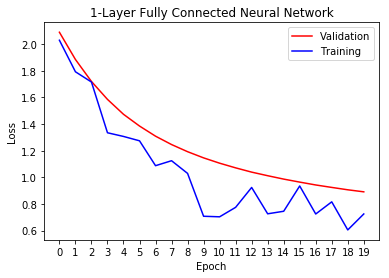

In [18]:
train_iter = iterators.SerialIterator(train, batch_size=32, shuffle=True)
test_iter = iterators.SerialIterator(test, batch_size=32, repeat=False, shuffle=False)

model = FCNN1(10)
optimizer = optimizers.SGD()
optimizer.setup(model)

epoch, train_loss, val_loss = train_model(model)
plot_training(epoch, train_loss, val_loss, '1-Layer Fully Connected Neural Network')
results.append((val_loss, train_loss, "FCNN1"))

('epoch:01 train_loss:2.1143 ', '')
val_loss:2.1558 val_accuracy:0.2949
('epoch:02 train_loss:1.9634 ', '')
val_loss:2.0328 val_accuracy:0.3984
('epoch:03 train_loss:1.7590 ', '')
val_loss:1.9058 val_accuracy:0.4951
('epoch:04 train_loss:1.7291 ', '')
val_loss:1.7783 val_accuracy:0.5674
('epoch:05 train_loss:1.5189 ', '')
val_loss:1.6526 val_accuracy:0.5928
('epoch:06 train_loss:1.2342 ', '')
val_loss:1.5389 val_accuracy:0.6357
('epoch:07 train_loss:1.3659 ', '')
val_loss:1.4384 val_accuracy:0.6562
('epoch:08 train_loss:1.1506 ', '')
val_loss:1.3444 val_accuracy:0.6797
('epoch:09 train_loss:1.1046 ', '')
val_loss:1.2638 val_accuracy:0.6943
('epoch:10 train_loss:1.0757 ', '')
val_loss:1.1916 val_accuracy:0.7188
('epoch:11 train_loss:0.8401 ', '')
val_loss:1.1312 val_accuracy:0.7266
('epoch:12 train_loss:0.8942 ', '')
val_loss:1.0758 val_accuracy:0.7373
('epoch:13 train_loss:1.0424 ', '')
val_loss:1.0288 val_accuracy:0.7412
('epoch:14 train_loss:0.9096 ', '')
val_loss:0.9865 val_accuracy

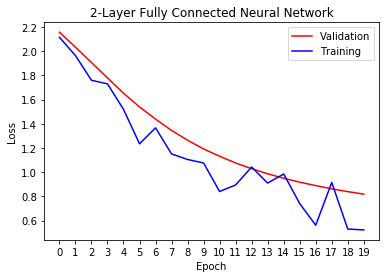

In [19]:
train_iter = iterators.SerialIterator(train, batch_size=32, shuffle=True)
test_iter = iterators.SerialIterator(test, batch_size=32, repeat=False, shuffle=False)
model = FCNN2(64,10)
optimizer = optimizers.SGD()
optimizer.setup(model)

epoch, train_loss, val_loss = train_model(model)
plot_training(epoch, train_loss, val_loss, '2-Layer Fully Connected Neural Network')
results.append((val_loss, train_loss, "FCNN2"))

('epoch:01 train_loss:3.8647 ', '')
val_loss:3.9225 val_accuracy:0.0771
('epoch:02 train_loss:3.5884 ', '')
val_loss:3.5413 val_accuracy:0.1777
('epoch:03 train_loss:2.8045 ', '')
val_loss:2.9202 val_accuracy:0.2314
('epoch:04 train_loss:2.3316 ', '')
val_loss:2.3608 val_accuracy:0.4287
('epoch:05 train_loss:1.9298 ', '')
val_loss:2.0238 val_accuracy:0.5625
('epoch:06 train_loss:1.5960 ', '')
val_loss:1.8248 val_accuracy:0.5557
('epoch:07 train_loss:1.6256 ', '')
val_loss:1.6430 val_accuracy:0.6270
('epoch:08 train_loss:1.3487 ', '')
val_loss:1.4847 val_accuracy:0.6621
('epoch:09 train_loss:1.3552 ', '')
val_loss:1.3497 val_accuracy:0.6777
('epoch:10 train_loss:1.0601 ', '')
val_loss:1.2398 val_accuracy:0.6592
('epoch:11 train_loss:0.8188 ', '')
val_loss:1.1436 val_accuracy:0.7148
('epoch:12 train_loss:0.7708 ', '')
val_loss:1.0597 val_accuracy:0.6914
('epoch:13 train_loss:0.6760 ', '')
val_loss:0.9904 val_accuracy:0.7266
('epoch:14 train_loss:0.8384 ', '')
val_loss:0.9377 val_accuracy

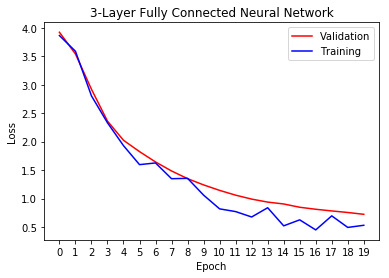

In [20]:
train_iter = iterators.SerialIterator(train, batch_size=32, shuffle=True)
test_iter = iterators.SerialIterator(test, batch_size=32, repeat=False, shuffle=False)
model = FCNN3(64,10)
optimizer = optimizers.SGD()
optimizer.setup(model)

epoch, train_loss, val_loss = train_model(model)
plot_training(epoch, train_loss, val_loss, '3-Layer Fully Connected Neural Network')
results.append((val_loss, train_loss, "FCNN3"))

The three plots that show the training and validation loss for neural networks with 1, 2 and 3 layers are shown above.
These plots show that the higher the number of layers, the smoother the training loss curve.
This is also visible in the combined plot shown below.

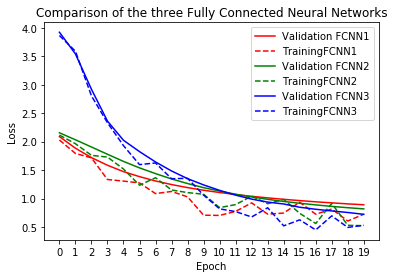

In [27]:
plot_comparison(epoch, results, "Comparison of the three Fully Connected Neural Networks")

### Performance convolutional neural network
TODO visualise (plot loss), interpret the results + report conclusions

('epoch:01 train_loss:1.5534 ', '')
val_loss:1.7150 val_accuracy:0.3350
('epoch:02 train_loss:1.0654 ', '')
val_loss:1.1592 val_accuracy:0.6787
('epoch:03 train_loss:0.7054 ', '')
val_loss:0.9579 val_accuracy:0.6895
('epoch:04 train_loss:0.5000 ', '')
val_loss:0.8374 val_accuracy:0.7373
('epoch:05 train_loss:0.9182 ', '')
val_loss:0.7211 val_accuracy:0.7646
('epoch:06 train_loss:0.5171 ', '')
val_loss:0.9396 val_accuracy:0.6846
('epoch:07 train_loss:0.3922 ', '')
val_loss:0.5692 val_accuracy:0.8252
('epoch:08 train_loss:0.8825 ', '')
val_loss:0.5882 val_accuracy:0.7910
('epoch:09 train_loss:0.7799 ', '')
val_loss:0.5604 val_accuracy:0.8232
('epoch:10 train_loss:0.7420 ', '')
val_loss:0.4956 val_accuracy:0.8330
('epoch:11 train_loss:0.2001 ', '')
val_loss:0.4027 val_accuracy:0.8730
('epoch:12 train_loss:0.1903 ', '')
val_loss:0.4570 val_accuracy:0.8467
('epoch:13 train_loss:0.2026 ', '')
val_loss:0.3916 val_accuracy:0.8799
('epoch:14 train_loss:0.2223 ', '')
val_loss:0.3545 val_accuracy

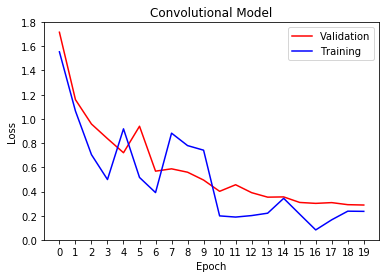

IndexError: list index out of range

In [29]:
# Load data and iterators
train, test = utils.get_mnist(n_train=100, n_test=100, n_dim=3, with_label=True)
train_iter = iterators.SerialIterator(train, batch_size=32, shuffle=True)
test_iter = iterators.SerialIterator(test, batch_size=32, repeat=False, shuffle=False)

model = CNN(64,10)
optimizer = optimizers.SGD()
optimizer.setup(model)

epoch, train_loss, val_loss = train_model(model)
plot_training(epoch, train_loss, val_loss, 'Convolutional Model')
cnn_result = (val_loss, train_loss, 'CNN')
plot_comparison(epoch, [results[3],cnn_result], "Comparison 3 layer Fully Connected Neural Network and a Convolutional Neural network")

TODO report conclusions

### Biological plausibility of convolution
Convlutional neural networks are known to be inspired by nature. 
The idea behind a convolutional layer is that neurons in the visual cortex have a specific area that they respond to; the receptive field.
Implementing this in a neural network causes that there are less neurons connected to each other, thus shrinking the amount of weights that need to be optimized in backpropagation.
To do that, however, it is necessary to find a way for multiple neuron outputs to be combined into one neuron input in the next layer.
This can, theoretically, be done in various ways, but the current preference is for a convolution.
To further decrease the number of parameters necessary to train in the neural network, the same convolution is used over the entire picture.
The choice of convultion is substatiated by the notion that a convolution mimics the acticity of a neuron.
This means that the result of the convolutional layer in terms of activation is very similar to that of normal input neurons that have the same activation.
The difference is that the convolutaional layer activation contains more detailed information than the, e.g. rbg, activation at the input level.

Thus the use of convolutions in deep neural networks is biologically plausible in the sense that it has a receptive field and neurons are combined in a sense that the output of the convolutional layer mimics neural activation.

However, there can still be a phylosophical debate about to what extend the convolution calculation itself is a good representation of what happens in the brain.
Mathematically, it is possible to generate infinite different functions with the same input and output as a given function, so we can never really know for sure when looking soley at input-output behaviour.
Nevertheless, the current solution is a simple and elegant interpretation of what happens in the brain, on some level.
Considering that nature tends to find the simplest mathematical solution to a problem, it would not be suprising if this is close to the real solution of image processing in the brain.
Only with more research we can determine definitively whether convolution is biologically plausible or not.


### Performance extended model
TODO visualise, interpret the results

In [12]:
# Train test, visualise, etc code

TODO Report if your new architecture outperforms the original convnet architecture.
Provide a plot and a written explanation of your observed (better/worse) results.